# Task 1.1
* Take a 100X100 grid. You will need to simulate the movement of a cell (like the grey cell in the figure above). 
* You will need to run the algorithm for a 100 steps, and plot the movement of the cell and if required for more steps.

In [1]:
# Imports reqired packages 
import numpy as np
import random
import matplotlib.pyplot as plt


In [2]:
# Defines the inishal peramtiers 
GridSize = 100
NumberOfLoops = 100

NumberOfUps = 0
NumberofDowns = 0
NumberOfLefts = 0
NumberOfRights = 0

In [3]:
# Creates the grid 
Grid = np.zeros((GridSize, GridSize))
# print(Grid)
# Calculates the inishal starting point -- assumes grid is squair 
InitalX = GridSize//2
InitalY = GridSize//2


# set current to inishal 
currentX = InitalX
currentY = InitalY


In [4]:
# UpdateACount

def MoveDirectionCount(x,y):
    global NumberOfUps, NumberofDowns, NumberOfLefts, NumberOfRights
    if x == currentX + 1:
        NumberOfRights = NumberOfRights + 1
    elif x == currentX - 1:
        NumberOfLefts = NumberOfLefts+ 1
    elif y == currentY + 1:
        NumberOfUps = NumberOfUps + 1
    elif y == currentY - 1:
        NumberofDowns = NumberofDowns + 1

In [ ]:
# Choose a new location to move to  8 direction
def MoveLocation8direction(Current_x, Current_y, Grid):
    # Generates a list of avalible moves, if avalible moves = 0 then retunrs the values given as a end value 

    # Generates a list of all of the positions that havent been filled - 
    UnfilledPositions = np.where(Grid == 0)
    UnfilledSet = set(zip(UnfilledPositions[0], UnfilledPositions[1]))

 #   print(UnfilledSet)
    # Calculates what cells are around it 
    CellsAround = [(Current_x - 1, Current_y - 1), (Current_x - 1, Current_y), (Current_x - 1, Current_y + 1),(Current_x, Current_y - 1), (Current_x, Current_y + 1),(Current_x + 1, Current_y - 1), (Current_x + 1, Current_y), (Current_x + 1, Current_y + 1)]

#    print(CellsAround)
    # checks to see if these cells are in the UnfilledPositions 
    ValliedCells = [cell for cell in CellsAround if cell in UnfilledSet]

#    print(ValliedCells)
    # checks if their is any, and picks one of these 
    if ValliedCells:
        print("Has values")

        # Selects one of the values from the list, does this by picking from the list using a unifrom distribution
        Selected = random.choice(ValliedCells)
        return Selected[0], Selected[1]
    else:
        print("No Values left ****")
        return Current_x, Current_y
    # returns this 


    return None

In [6]:
# Choose a new location to move to 
def MoveLocation4direction(Current_x, Current_y):
    # Generates a list of avalible moves, if avalible moves = 0 then retunrs the values given as a end value 

    # Generates a list of all of the positions that havent been filled - 
    # UnfilledSet = set(zip(Grid[0], Grid[1]))

    UnfilledPositions = np.where(Grid == 0)
    UnfilledSet = set(zip(UnfilledPositions[0], UnfilledPositions[1]))

    #print(UnfilledSet)
    # Calculates what cells are around it 
    CellsAround = [ (Current_x - 1, Current_y),(Current_x, Current_y - 1), (Current_x, Current_y + 1), (Current_x + 1, Current_y)]

    #print(CellsAround)
    # checks to see if these cells are in the UnfilledPositions 
    ValliedCells = [cell for cell in CellsAround if cell in UnfilledSet]


    # Selects one of the values from the list, does this by picking from the list using a unifrom distribution
    Selected = random.choice(ValliedCells)

    # updates count of direction moves 
    MoveDirectionCount(Selected[0], Selected[1])
    return Selected[0], Selected[1]
   

In [7]:
# Display a graph for how many it picked of each type
def GraphForDirectionPicked():
    directions = ['North', 'South', 'West', 'East',]
    counts = [NumberOfUps, NumberofDowns, NumberOfLefts, NumberOfRights]


    # Calculate the mean
    mean_count = np.mean(counts)
    # Plot the bar chart
    plt.bar(directions, counts, color='grey')
    plt.axhline(mean_count, color='orange', linewidth=1, label=f'Mean: {mean_count:.2f}')
    plt.title('Number of movements')
    plt.xlabel('Direction')
    plt.ylabel('Count')
    plt.legend()
    plt.show()
    return None

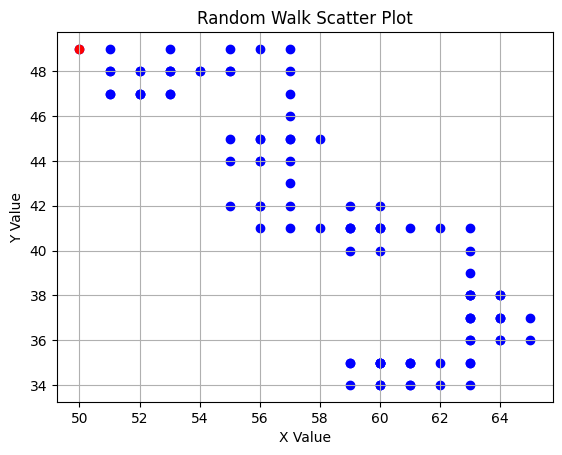

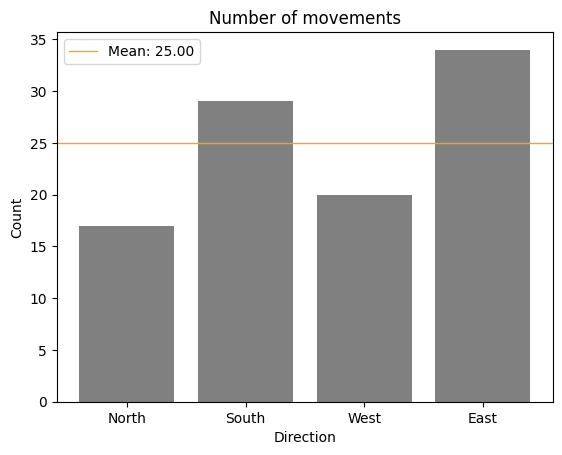

In [8]:
Results = []
for i in range(NumberOfLoops):
   currentX, currentY =  MoveLocation4direction(currentX,currentY)
   Results.append([currentX, currentY])

NPResults = np.array(Results)

# Plot a graph of the locations 
plt.scatter(NPResults[:, 0], NPResults[:, 1], c='blue', marker='o')
plt.scatter(NPResults[0, 0], NPResults[0, 1], c='red', marker='o', label='Start Point')
plt.title('Random Walk Scatter Plot')
plt.xlabel('X Value')
plt.ylabel('Y Value')
plt.grid(True)
plt.show()


thing = GraphForDirectionPicked()
